### Kaggle Description

__Horse Racing - A different and profitable approach__


The traditional approach in attempting to make a profit from horse-racing, using machine learning techniques, is to use systems involving dozens and dozens of variables. These systems include the following types of variables:

Horse - Name, Sex, Age, Pedigree, Weight, Speed over various distances, race data with finishing times and positions - etc. Trainer info. Jockey info. Track info - Track, track conditions - etc.

And a whole lot more.

Finding, compiling, maintaining and updating this data is a massive task for the individual. Unless you have access to a database of such data - where would you even start?

We have a different approach.

We collect, maintain and use data from various 'Tipsters'. The tipsters use their skill to study the horses and make a prediction - that they think a particular horse will win a particular race. We take those tipsters predictions and put them through a machine learning algorithm (microsoft azure) asking it to predict a 'win' or 'lose' based upon the tipsters performance history.

We have a database of approx. 39,000 bets using 31 odd tipsters. Fifteen tipsters are active and sixteen tipsters are inactive The betting history for the inactive tipsters is used in the dataset as it appears to add 'weight' to the system when considering active tips.


### Preliminaries

In [1]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
# import classification algorithms
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('tips.csv',index_col='UID')
print ('shape:{}'.format(df.shape))
df.head()

shape:(38248, 9)


,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
UID,,,,,,,,,
1,1,Tipster A,24/07/2015,Ascot,Fredricka,Win,8.00,Lose,True
2,2,Tipster A,24/07/2015,Thirsk,Spend A Penny,Win,4.50,Lose,True
3,3,Tipster A,24/07/2015,York,Straightothepoint,Win,7.00,Lose,True
4,4,Tipster A,24/07/2015,Newmarket,Miss Inga Sock,Win,5.00,Lose,True
5,5,Tipster A,25/07/2015,Ascot,Peril,Win,4.33,Win,True


### Data wrangling
__Univariate Analysis__

In [3]:
df.dtypes

ID                 int64
Tipster           object
Date              object
Track             object
Horse             object
Bet Type          object
Odds             float64
Result            object
TipsterActive       bool
dtype: object

In [4]:
# collecting categorical varibale names 
cat_var = df.dtypes.loc[df.dtypes=='object'].index
print(cat_var)

Index([u'Tipster', u'Date', u'Track', u'Horse', u'Bet Type', u'Result'], dtype='object')


In [5]:
# check for unique variables in cat_var
df[cat_var].apply(lambda x: len(x.unique()))

Tipster        31
Date         1055
Track         116
Horse       15791
Bet Type        3
Result          2
dtype: int64

In [6]:
print(df['Bet Type'].value_counts())
print('~'*30)
print(df['Bet Type'].value_counts()/df['Bet Type'].shape[0]*100)

Win         30417
Each Way     7830
win             1
Name: Bet Type, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Win         79.525727
Each Way    20.471659
win          0.002615
Name: Bet Type, dtype: float64


In [7]:
# Lose vs Win ratio
print(df['Result'].value_counts())
print('~'*30)
print(df['Result'].value_counts()/df.Result.shape[0]*100)

Lose    30565
Win      7683
Name: Result, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Lose    79.912675
Win     20.087325
Name: Result, dtype: float64


In [8]:
# Tipster active vs unactive
print(df.TipsterActive.value_counts()/df.TipsterActive.shape[0]*100)

True     65.849195
False    34.150805
Name: TipsterActive, dtype: float64


In [9]:
df.Odds.describe()

count    38248.000000
mean        10.994968
std         11.004589
min          1.070000
25%          5.000000
50%          8.000000
75%         13.000000
max        407.000000
Name: Odds, dtype: float64

### Multivirate Analysis

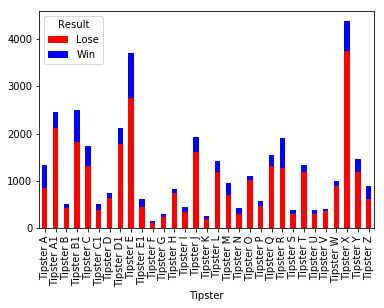

In [10]:
# Tipster's performance
cross_tab = pd.crosstab(df['Tipster'], df['Result'], margins=True)
cross_tab.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False);

### Checking for missing values

In [11]:
df.apply(lambda x: sum(x.isnull()))
# dataset looks clear of any null values, good here!

ID               0
Tipster          0
Date             0
Track            0
Horse            0
Bet Type         0
Odds             0
Result           0
TipsterActive    0
dtype: int64

In [12]:
# since we cannot plug categorical values we need to convert it to numerical values
# since this is taken care by the LabelEncoder() function from sklearm.preprocessing
le = LabelEncoder()

for var in cat_var:
    df[var] = le.fit_transform(df[var])

In [13]:
print(cat_var)
df['TipsterActive'].replace({True:1,False:0},inplace=True)
df.head()

Index([u'Tipster', u'Date', u'Track', u'Horse', u'Bet Type', u'Result'], dtype='object')


,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
UID,,,,,,,,,
1,1,0,818,2,5158,1,8.00,0,1
2,2,0,818,96,13108,1,4.50,0,1
3,3,0,818,114,13411,1,7.00,0,1
4,4,0,818,74,8976,1,5.00,0,1
5,5,0,851,2,10554,1,4.33,1,1


In [14]:
X = df.drop(['Date','Result'],axis=1)
y = df.Result


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((30598, 7), (7650, 7), (30598L,), (7650L,))


In [15]:
# list of classifiers
classifers = [GaussianNB(), LogisticRegression(n_jobs=-1), DecisionTreeClassifier(min_samples_leaf=5,min_samples_split=17,random_state=1), KNeighborsClassifier(n_neighbors=5, leaf_size=50, p=3)]
for cl in classifers:
    clf = cl
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)*100
    print('Accuracy of %r Classifier = %2f' % (cl, accuracy) + ' %')
    print('\n')

Accuracy of GaussianNB(priors=None) Classifier = 80.326797 %


Accuracy of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) Classifier = 80.326797 %


Accuracy of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=17,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best') Classifier = 75.176471 %


Accuracy of KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=3,
           weights='uniform') Classifier = 76.810458 %


